# CA1

Scenario: 

You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.

The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

Minimum Requirements 

You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings:

Characterization of the data set: size; number of attributes; has/does not have missing values, number of observations etc.

Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.
Conclusions, Findings of data set and references (HARVARD style).
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).

All Code must be included in code blocks (As normal). No other upload will be accepted.

All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).



# Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.

The Curse of Dimensionality occurs when it is hard to get meaningful patterns within the data due its large number of features (dimensions). The analysis may be affected by different reasons, two of them are:
- the amount of time that the algorithms have to process high-dimensional data;
- the amount of noise surpassing the significant patterns, causing the phenomenal called overfitting and impacting on the generalisation of the model;

# IMORTING LIBRARIES

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

In [2]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


# EDA

Exploratory Data Analysis. 

After importing the necessary labraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there is any missing or duplicated values and what kind of ditribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (ibm, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 

In [3]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [4]:
ca1.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [5]:
ca1.shape

(60000, 171)

The shape of our dataset tells us that we have 60,000 observations distributed into 171 features. Some questions can be made in this point: 
- Is there any missing or duplicated values within the observations?;
- Are all the independent variables important to explain the target variable?

We need to keep exploring our raw data to answer those and other questions. 

In [6]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


The function .info() shows us that something is wrong with our observations. We know that all of our independent variables should be classified as numbers (int64 or float64) by the description of our dataset. Early when we looked at the head we saw a lot of numbers and some "na" observations. All the features are being considered as objects which means these "na" are strings, that is the reason why we are going to see that apparently we do not have any missing values in our dataset.

In [7]:
ca1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

As written above, no missing values were found because all the independent variables are considered as objects. The following steps will include substitute all the "na" strings for the special value "NaN", counting the missing values and testing which is going to be the best way to deal with them

In [8]:
ca1.describe(include = "object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


From the 20 collumns out of 171 that we can see in this descriptions in two we can see the occurance of "na". In the "ab_000" collumn 77.21% of all observations are "na" and in the "ad_000" 24.76%. It could be problematic if this is a constant in the structer of our dataset because the amount of missing values is high and significant information might be lost if is not properly dealt.

<Axes: xlabel='class', ylabel='Count'>

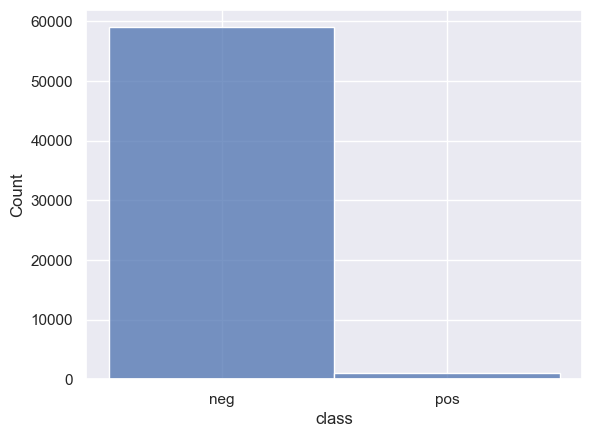

In [9]:
sns.histplot(data = ca1, x = "class")

By plotting the histogram of the target variable "class" we can see that the distribution is strongly skewed to the right. The amount of failures for componets not related to the APS system it is significantly superior than the ones related to the APS. It is important to check the distribution to base futures decisions on the EDA, for example on dealing with the missing variables. 

In [10]:
ca1.duplicated().sum()

0

In [11]:
miss_vals = ["na"]

Defining that all missing values are "na"

In [12]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

Substituting all missing values for the special value NaN so the collums can be counted as numbers (float or int64) and not objects as before.

In [13]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


The only object collumn is the "class" where the target variable is held.

In [14]:
ca1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [15]:
ca1['class'].replace('neg', 0, inplace = True)
ca1['class'].replace('pos', 1, inplace = True)

In [16]:
ca1.isnull().sum().head(50)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
dtype: int64

Now that the substitutions were made we can have a clearer picture of our dataset and start the experiments and decide which is going to be the best way to deal with it.

The maximum of columns that it is shown is 50. The idea is to check all the columns to see if it is important to keep all of them when replacing the missing variables. As we saw above some features have more than 70% of observations missing. Is it important to keep those columns? If we replace this high amount of missing values with one of the measures of central tendency or another technique will we input bias to the dataset? In order to answer those questions that have arisen from this step of the EDA it is necessary to do some experiments and analyse which method is the best choice.


There are three classes of Missing Data (Kaiser, 2014):

- Missing Completely at Random: in this case the observed data or the missing data do not impact on the occurance of a record having missing values. For example when the data is lost in a laboratory due an accident while conducting the reaserch. 

- Missing ar Random: while in the previous class the observed data does not have an impact, in this case it does, the difference is that the probability of having a missing value is not impacted by the missing value itself. It might happen when the researcher does not get the information required, for example in a questionnaire where salary is one of the questions the missing values could be from the ones that earn more tend to be more reluctant to answer. 

- Not Missing at Random: Acoording to (Stef van Buuren, 2018), this is the most complex case when the reasons why the values are missing are not known. One of the reasons could be the instruments in a laboratory are not working effective and the reasercher does not notice it.

Unfortunately for this project will not be possible to verify why those data are missing, 



In [17]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_50 = nperc[nperc > 50]

print(more_than_50)

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [18]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_40 = nperc[nperc > 40]

print(more_than_40)

ab_000    77.215000
bl_000    45.461667
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [19]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

more_than_30 = nperc[nperc > 30]

print(more_than_30)

ab_000    77.215000
bk_000    38.390000
bl_000    45.461667
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64


In [20]:
isnull = ca1.isnull().sum()

nperc = (isnull / (len(ca1))) * 100

less_than_30 = nperc[nperc < 30]

print(less_than_30)

class      0.000000
aa_000     0.000000
ac_000     5.558333
ad_000    24.768333
ae_000     4.166667
            ...    
ee_007     1.118333
ee_008     1.118333
ee_009     1.118333
ef_000     4.540000
eg_000     4.538333
Length: 161, dtype: float64


8 columns with more than 50% of the values null (4,67%)

9 columns with more than 40% of the values null (5,26%)

10 columns with more than 30% of the values null (5,84%)

In [21]:
ca1.shape

(60000, 171)

In [22]:
class_ca1 = ca1[["class"]]

class_ca1.head()

,class
0,0
1,0
2,0
3,0
4,0


In [23]:
class_ca1.count()

class    60000
dtype: int64

In [24]:
class_ca1.value_counts()

class
0        59000
1         1000
dtype: int64

As it was seen before in the histogram, the distribution is skewed to the right concentrating 98.33% of the values in the class "neg" (0).

# SPLITTING THE DATASET 

Splitting the dataset in y (target variable) and X (independent variables) to simplify the next steps.

In [25]:
ca1_split = ca1.drop(["class"], axis = 1)

ca1_split.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [26]:
X = ca1_split

y = class_ca1

In [27]:
y.value_counts()

class
0        59000
1         1000
dtype: int64

# DROPPING MISSING VALUES 

The first experiment with the missing values. How the dataset will look like if all the missing values are dropped? How much information will be lost? Is this the better way to deal with it?

In [28]:
ca1_d = ca1.dropna(axis = 0)

Dropping all the missing values on the rows.

In [29]:
ca1_d.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,0,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,0,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,0,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,1,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,1,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [30]:
class_d = ca1_d[["class"]]

class_d.head()

,class
16,0
179,0
225,0
394,1
413,1


In [31]:
class_d.value_counts()

class
0        515
1         76
dtype: int64

Target variable from the dataset without the missing values.

In [32]:
ca1_d.shape

(591, 171)

The amount of missing values is so massive that the remain dataset will have only 591 rows (0.985%) after removing all the rows with missing values, losing 99.015% of the original dataset. This is a huge loss of information and can be impact negatively in the Machine Learning Model. Further in the analysis I will compare the results of models excluding the missing values with the ones where I replaced them. 

In [33]:
ca1_d.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,591.000000,5.910000e+02,591.00000,5.910000e+02,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02,...,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,5.910000e+02,591.000000,591.000000,591.000000
mean,0.128596,2.809300e+05,0.80203,2.451586e+08,908.297800,227.695431,338.355330,45.972927,3922.186125,6.560618e+04,...,1.188929e+06,5.704084e+05,1.156445e+06,1.221455e+06,2.050994e+06,2.206999e+06,4.870669e+04,99.238579,0.439932,2.741117
std,0.335035,2.242716e+05,4.12677,6.804699e+08,1232.497585,1387.910299,1484.992857,567.505239,30513.434204,3.621030e+05,...,3.378870e+06,1.657034e+06,4.198702e+06,2.441378e+06,2.806046e+06,5.846784e+06,1.216914e+05,544.489432,5.005356,27.278830
min,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,1.577120e+05,0.00000,3.770000e+02,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,3.681070e+05,1.648850e+05,3.113240e+05,2.230640e+05,3.545410e+05,1.032010e+05,1.990000e+03,0.000000,0.000000,0.000000
50%,0.000000,1.952680e+05,0.00000,8.600000e+02,544.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,7.713860e+05,3.664700e+05,6.812140e+05,6.180840e+05,1.148528e+06,6.797620e+05,1.045200e+04,0.000000,0.000000,0.000000
75%,0.000000,3.037300e+05,0.00000,2.367000e+03,1070.000000,0.000000,0.000000,0.000000,0.000000,2.124000e+03,...,1.316493e+06,6.130590e+05,1.169780e+06,1.285274e+06,2.649181e+06,2.841454e+06,4.298200e+04,8.000000,0.000000,0.000000
max,1.000000,1.675586e+06,68.00000,2.130706e+09,8588.000000,21050.000000,20070.000000,8516.000000,484922.000000,6.328192e+06,...,7.793393e+07,3.775839e+07,9.715238e+07,3.411102e+07,2.811407e+07,1.195801e+08,1.626932e+06,8106.000000,86.000000,606.000000


Even after dropping the missing values the distribution is still skewed to the right with a considerable difference. 

# REPLACING MISSING VALUES WITH THE MEDIAN

Two important facts that was found on the EDA process is:
- The distribution is significant skewed, and;
- The amount of missing values is also signigicant. 


Bias can be introduced in the dataset when using the summary statistics to repaclace the missing values, once the missing values are treated as similar to the non-missing ones (Kumar, 2021). To choose the best imputation techinique it is important to study the dataset and its caracheristics as it was done in the EDA. In this part of the project the Median will be used for imputation due the skewness of distribution of the target variable, once the Median is less sensitive to outliers than the other summary statistics (Kumar, 2021).

In [34]:
X.fillna(X.median(), inplace = True)

In [35]:
X.shape

(60000, 170)

In [36]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [37]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [38]:
y.value_counts()

class
0        59000
1         1000
dtype: int64

# Standardisation and Variance

In [39]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

The standardisation is an important step so all the variables can contribute equally to the analysis, otherwise the results might be biased once the variables with larger ranges will dominate over the smaller ones. "Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable." (Jaadi, 2019).

In [40]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [41]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

var

array([ 28.8,  33.5,  37.8,  41.4,  44.3,  46.7,  48.6,  50.4,  52.2,
        53.8,  55.2,  56.6,  57.8,  59. ,  60.1,  61.2,  62.2,  63.2,
        64.2,  65.2,  66.1,  67. ,  67.9,  68.8,  69.6,  70.4,  71.2,
        71.9,  72.6,  73.3,  74. ,  74.7,  75.4,  76.1,  76.7,  77.3,
        77.9,  78.5,  79.1,  79.7,  80.3,  80.9,  81.5,  82.1,  82.7,
        83.2,  83.7,  84.2,  84.7,  85.2,  85.7,  86.2,  86.6,  87. ,
        87.4,  87.8,  88.2,  88.6,  89. ,  89.4,  89.8,  90.2,  90.6,
        90.9,  91.2,  91.5,  91.8,  92.1,  92.4,  92.7,  93. ,  93.3,
        93.6,  93.9,  94.1,  94.3,  94.5,  94.7,  94.9,  95.1,  95.3,
        95.5,  95.7,  95.9,  96.1,  96.3,  96.5,  96.7,  96.9,  97.1,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1,

One of the tasks of this project is to find how many variables is needed to retain 99.5% of the variance.

The array above shows the cumulative variance of the principal components. 

In [42]:
pca.explained_variance_ratio_

array([2.87521300e-01, 4.72864002e-02, 4.27757709e-02, 3.58113416e-02,
       2.89658247e-02, 2.35472479e-02, 1.94878785e-02, 1.77520475e-02,
       1.76110981e-02, 1.55473175e-02, 1.43068410e-02, 1.38910181e-02,
       1.22921487e-02, 1.16914706e-02, 1.13712329e-02, 1.08604104e-02,
       1.02075946e-02, 1.01106996e-02, 9.74146397e-03, 9.71715168e-03,
       9.39142994e-03, 9.17687746e-03, 8.99566132e-03, 8.74410079e-03,
       7.89393561e-03, 7.75902494e-03, 7.61637993e-03, 7.26672826e-03,
       7.11572100e-03, 6.95314996e-03, 6.88894067e-03, 6.76859988e-03,
       6.63880204e-03, 6.51154993e-03, 6.48354384e-03, 6.40318063e-03,
       6.16452932e-03, 6.01861287e-03, 5.93526314e-03, 5.91136569e-03,
       5.84779072e-03, 5.75104975e-03, 5.62839734e-03, 5.60688893e-03,
       5.54007234e-03, 5.44528556e-03, 5.29056163e-03, 5.20895385e-03,
       4.93001133e-03, 4.86366740e-03, 4.60297435e-03, 4.54322921e-03,
       4.45017521e-03, 4.29155708e-03, 4.24309885e-03, 4.16235535e-03,
      

The individual variance of each principal component. As the dataset has 171 features it is difficult to analyse each result. For this reason the cumulative variance and the next graphic will be more useful for the decision on how many components is needed.

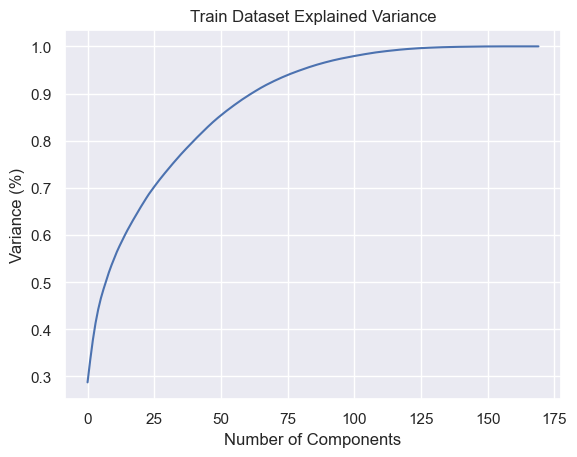

In [43]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

The graph shows that to get 100% variance the minimum amount of components is 125 and to get the 


In this graph we can see that we can get 100% variance with 125 components, and something between 95% and 100% with 100 components. 

In [44]:
computed_covmat = pca.get_covariance()

print("comvat from PCA:")

print("{}".format(computed_covmat))

comvat from PCA:
[[ 1.00001667e+00  1.40856374e-02 -6.38774595e-02 ...  2.47153607e-01
   1.24087718e-02  2.43878095e-02]
 [ 1.40856374e-02  1.00001667e+00 -2.12835630e-03 ... -1.62475716e-02
   5.62720836e-02  1.06362225e-01]
 [-6.38774595e-02 -2.12835630e-03  1.00001667e+00 ...  1.37644263e-02
  -6.26212934e-03  1.47471475e-02]
 ...
 [ 2.47153607e-01 -1.62475716e-02  1.37644263e-02 ...  1.00001667e+00
  -3.43901873e-03 -9.71000041e-04]
 [ 1.24087718e-02  5.62720836e-02 -6.26212934e-03 ... -3.43901873e-03
   1.00001667e+00  2.82205226e-01]
 [ 2.43878095e-02  1.06362225e-01  1.47471475e-02 ... -9.71000041e-04
   2.82205226e-01  1.00001667e+00]]


This matrix shows the variance between the variables. However, as it was discussed before, it is difficult to analyse this due the amount of features of the dataset. The matrix and a heatmap could be useful for a analysis in a smaller dataset.

# APPLYING PCA



The earlier steps 


In [45]:
pca = PCA(n_components = 100)

ca1_pca = pca.fit_transform(X_scaled)

i am passing my data frame in the pca algorithm so it can analise, and I do this with the data fram without the target variable.

X is all the features except the class

In [46]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755184,0.397274,0.002816,-0.358144,-1.403680,...,-0.146177,0.253358,0.256650,0.038775,-0.269108,-0.324284,0.036295,-0.228707,0.020121,0.485833
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137165,0.109338,0.174649,-0.006077,0.139656,0.244999,...,-0.330884,-0.224547,-0.078236,-0.355783,0.198965,0.222383,0.447151,0.281750,0.059693,0.062094
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089637,-0.081018,-0.017045,-0.107396,0.156670,...,0.044133,0.008055,-0.055281,0.047602,0.000161,-0.060874,-0.057562,-0.001846,0.004258,-0.059551
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,...,0.013232,0.015341,-0.003729,-0.013071,-0.013006,0.040135,-0.002297,-0.044152,-0.026773,-0.009745
4,0.323156,-0.064226,-0.612063,0.688140,-0.565306,0.215714,0.068441,0.007874,-0.514091,-1.137269,...,0.022955,0.220627,0.197904,0.023299,0.019060,-0.093501,0.035612,0.264393,0.119812,-0.262454


In [47]:
ca1_concat = pd.concat([ca1_pca, y[["class"]]], axis = 1)

ca1_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755184,0.397274,0.002816,-0.358144,-1.403680,...,0.253358,0.256650,0.038775,-0.269108,-0.324284,0.036295,-0.228707,0.020121,0.485833,0
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137165,0.109338,0.174649,-0.006077,0.139656,0.244999,...,-0.224547,-0.078236,-0.355783,0.198965,0.222383,0.447151,0.281750,0.059693,0.062094,0
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089637,-0.081018,-0.017045,-0.107396,0.156670,...,0.008055,-0.055281,0.047602,0.000161,-0.060874,-0.057562,-0.001846,0.004258,-0.059551,0
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,...,0.015341,-0.003729,-0.013071,-0.013006,0.040135,-0.002297,-0.044152,-0.026773,-0.009745,0
4,0.323156,-0.064226,-0.612063,0.688140,-0.565306,0.215714,0.068441,0.007874,-0.514091,-1.137269,...,0.220627,0.197904,0.023299,0.019060,-0.093501,0.035612,0.264393,0.119812,-0.262454,0


# SPLITTING AND TRAINING OUR MODEL

In [48]:
ca1_array = ca1_concat.values

In [49]:
X = ca1_array[:,0:100]

y = ca1_array[:,100]

In [50]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
X

array([[ 2.37449964e+00, -1.12764943e+00, -8.70419273e-01, ...,
        -2.28706703e-01,  2.01214284e-02,  4.85832562e-01],
       [-6.15523996e-01, -5.50442549e-01, -3.55693313e-02, ...,
         2.81749592e-01,  5.96931320e-02,  6.20936668e-02],
       [-1.20585236e+00, -5.97210920e-02, -7.71610133e-01, ...,
        -1.84594029e-03,  4.25807638e-03, -5.95505806e-02],
       ...,
       [-3.20040141e+00,  1.66400831e-01, -4.14852757e-01, ...,
        -2.05482426e-02, -1.15153580e-01, -1.02303434e-02],
       [ 2.38351419e+00, -2.50409802e+00, -1.14449437e+00, ...,
        -8.29958909e-01,  5.35760616e-01,  1.33464462e+00],
       [-7.24923591e-01, -3.98952751e-01, -6.18277932e-01, ...,
        -7.70942111e-02, -4.11400427e-02,  2.03479874e-02]])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

random_state create the random numbers to train the ML

# MODELS

Applying the models learnt in the Machine Learning Course

In [53]:
from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# SVM 

explain the model

In [54]:
from sklearn import svm

In [55]:
cls_svm = svm.SVC(kernel = "linear") 

cls_svm.fit(X_train, y_train)

y_pred_svm = cls_svm.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_svm)) )

print(classification_report(y_test, y_pred_svm))

y_predict = cls_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cm, annot = True)

# KNN MODEL

explain de model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
kNN = KNeighborsClassifier(n_neighbors = 9)

kNN.fit(X_train, y_train)

y_pred_knn = kNN.predict(X_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

print( "accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_knn)) )

print(classification_report(y_test, y_pred_knn))

y_pred_knn = kNN.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot = True)

# DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [66]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

clf = clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_dt)) )

print(classification_report(y_test, y_pred_dt))

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring = 'r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
    
    

In [71]:
lr = LinearRegression().fit(X_train, y_train)

In [72]:
get_cv_scores(lr)

CV Mean:  -33728.46983299553
STD:  101186.44992053279




In [73]:
print(lr.intercept_)
print(lr.coef_)

0.016436192401684663
[ 9.41277860e-03  2.63575179e-03  3.21408805e-03 -5.56227230e-03
 -4.13343480e-03 -7.44624462e-03  3.76813077e-03  6.76912223e-05
  1.41591449e-02 -1.28718174e-03 -9.10117774e-03 -8.37787876e-03
  4.01492607e-03  1.39005883e-03  9.63312345e-03 -8.93869005e-03
  4.52122029e-03  6.39095189e-03  9.92563138e-04  3.50015512e-04
 -4.34642173e-03 -9.44105746e-04 -1.68491530e-03  2.92167237e-03
  8.68341335e-03 -3.08878624e-04 -6.54093073e-03 -4.12879856e-03
 -5.82692957e-03  6.40570033e-03  3.42870600e-03  2.19461014e-03
  2.82240240e-03 -4.79863281e-04 -1.65536212e-03  6.76457034e-03
 -2.53025018e-03 -3.04412154e-03  4.72562947e-04  7.39419335e-04
 -5.04485819e-03  1.13328307e-03 -5.67928383e-03 -1.26173346e-03
 -3.37195995e-03 -4.63426273e-03  6.26377820e-03 -9.83580723e-03
  6.21636718e-04 -8.73886944e-03 -3.77789020e-04 -2.23099129e-03
 -3.95644413e-04 -7.28370985e-03  1.88028681e-03 -6.91436396e-03
  5.64415502e-03 -4.15937540e-03 -1.33805728e-02 -5.10535087e-03
 -5.

In [74]:
y_pred_lr = lr.predict(X_test)

In [75]:
linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
linear.head()

,Actual,Predicted
0,0.0,-0.001055
1,0.0,-0.005145
2,0.0,-0.004778
3,0.0,-0.005053
4,0.0,-0.003601


In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error: 0.026367911447243236
Mean Squared Error: 0.0089509114309279
Root Mean Squared Error: 0.09460925658162578


# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


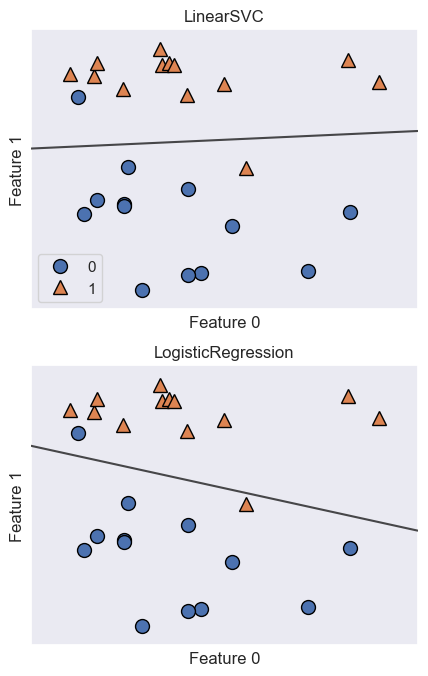

In [79]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(2, 1, figsize=(5, 8)) #first is the number of rows and the 2nd is the numbers
#of columns 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

# Gaussian Naive Bayes and Support Vector Machine

## Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
nvclassifier = GaussianNB()

nvclassifier.fit(X_train, y_train)

GaussianNB()

In [82]:
y_pred_gnb = nvclassifier.predict(X_test)

print(y_pred_gnb)

[0. 0. 0. ... 0. 0. 0.]


In [83]:
y_compare = np.vstack((y_test,y_pred_gnb)).T

y_compare[:30,:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [84]:
score = accuracy_score(y_test, y_pred_gnb)
print(score)

0.9653333333333334


In [85]:
nvclassifier = GaussianNB()

cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean()

0.9333333333333332

In [86]:
print("Accuracy SVM:", metrics.accuracy_score(y_test, y_pred_svm))

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred_knn))

print("Accuracy DT:",metrics.accuracy_score(y_test, y_pred_dt))

print("Accuracy GNB:", accuracy_score(y_test, y_pred_gnb))

print("Accuracy GNB_CV:", cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 10).mean())

Accuracy SVM: 0.9906666666666667
Accuracy KNN: 0.9881666666666666
Accuracy DT: 0.9853333333333333
Accuracy GNB: 0.9653333333333334
Accuracy GNB_CV: 0.9333333333333332


# Dropping all the rows with missing values

- Accuracy SVM: 0.957983193277311

- Accuracy KNN: 0.957983193277311

- Accuracy DT: 0.8907563025210085

- Accuracy GNB: 0.8403361344537815

- Accuracy GNB_CV: 0.8103389830508474

# Dropping the columns with more than 50% of missing values

- Accuracy SVM: 0.9908333333333333

- Accuracy KNN: 0.9883333333333333

- Accuracy DT: 0.9866666666666667

- Accuracy GNB: 0.9651666666666666

- Accuracy GNB_CV: 0.9650166666666667